<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/sklearn(softmax1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [145]:
from google.colab import files
import io
data = files.upload()

Saving result.csv to result (5).csv


In [149]:
df = pd.read_csv('result.csv')

In [150]:
train=df.sample(frac=0.8)
test=df.sample(frac=0.2)

In [151]:
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std

test -= mean
test /= std

In [152]:
train_data_set = train.values
x_train = train_data_set[:, 2:-1].astype(float)
y_train = train_data_set[:, -1].astype(float)

In [153]:
test_data_set = test.values
x_test = test_data_set[:, 2:-1].astype(float)
y_test = test_data_set[:, -1].astype(float)

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_dim = 11, activation='softmax'))
model.add(Dense(500,activation='softmax'))
model.add(Dense(300,activation='softmax'))
model.add(Dense(200,activation='softmax'))
model.add(Dense(1))

In [155]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

In [156]:
hist=model.fit(x_train, y_train, epochs=120, batch_size=32)

Epoch 1/120
26/26 [==============================] - 1s 12ms/step - loss: 0.9997 - mae: 0.8170
Epoch 2/120
26/26 [==============================] - 0s 11ms/step - loss: 0.9990 - mae: 0.8166
Epoch 3/120
26/26 [==============================] - 0s 12ms/step - loss: 0.9989 - mae: 0.8163
Epoch 4/120
26/26 [==============================] - 0s 12ms/step - loss: 0.9992 - mae: 0.8162
Epoch 5/120
26/26 [==============================] - 0s 13ms/step - loss: 0.9989 - mae: 0.8163
Epoch 6/120
26/26 [==============================] - 0s 13ms/step - loss: 0.9989 - mae: 0.8163
Epoch 7/120
26/26 [==============================] - 0s 12ms/step - loss: 0.9990 - mae: 0.8163
Epoch 8/120
26/26 [==============================] - 0s 11ms/step - loss: 0.9993 - mae: 0.8165
Epoch 9/120
26/26 [==============================] - 0s 12ms/step - loss: 0.9989 - mae: 0.8161
Epoch 10/120
26/26 [==============================] - 0s 11ms/step - loss: 0.9989 - mae: 0.8160
Epoch 11/120
26/26 [=============================

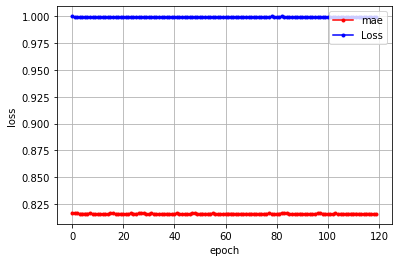

In [158]:
y_acc = hist.history['mae']
y_loss = hist.history['loss']#x_len = np.arange(len(y_loss)) 
x_len = np.arange(120)
plt.plot(x_len, y_acc[:120], marker='.', c='red', label="mae")
plt.plot(x_len, y_loss[:120], marker='.', c='blue', label="Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [159]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[0.9997471570968628, 0.9989733099937439, 0.9989306926727295, 0.9991597533226013, 0.9989334940910339, 0.9989340305328369, 0.998956024646759, 0.9993031024932861, 0.9989495873451233, 0.998885989189148, 0.9989044666290283, 0.9989330768585205, 0.998862087726593, 0.9993000030517578, 0.9988952875137329, 0.9990448355674744, 0.9990481734275818, 0.9989655613899231, 0.998867928981781, 0.998993456363678, 0.9988721609115601, 0.9989445805549622, 0.9988552331924438, 0.9991540312767029, 0.9989513754844666, 0.9991269111633301, 0.9991697072982788, 0.9991927146911621, 0.9990057945251465, 0.9993181824684143, 0.9988556504249573, 0.9992833137512207, 0.998869001865387, 0.9988844990730286, 0.9988435506820679, 0.9989800453186035, 0.9992468357086182, 0.9989870190620422, 0.9990251064300537, 0.999125063419342, 0.9989917278289795, 0.999377429485321, 0.9992861151695251, 0.9988667964935303, 0.9988424777984619, 0.9991677403450012, 0.9988735914230347, 0.9990463256835938, 0.9988972544670105,

In [160]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

7/7 [==============================] - 0s 4ms/step - loss: 0.9907 - mae: 0.8224
## evaluation loss and_metrics ##
[0.990715742111206, 0.8224150538444519]


In [161]:
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)
print(y_test[0:1])

## yhat ##
[[0.00450653]]
[-0.31594153]
